In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
pd.set_option("display.precision", 3)

In [12]:
folderToOpen = Path("../Datasets/")
fileName = "InsectLightTrap.csv"
filePath = folderToOpen / fileName
df_InsectTrap = pd.read_csv(filePath, encoding = "latin1")

Everything loaded all right, what's in the dataset?

In [13]:
df_InsectTrap.columns

Index(['order', 'family', 'name', 'year', 'date1', 'date2', 'individuals'], dtype='object')

In [14]:
df_InsectTrap.count()

order          44088
family         44088
name           44088
year           44088
date1          44088
date2          44088
individuals    44088
dtype: int64

In [15]:
df_InsectTrap.order.unique()

array(['LEPIDOPTERA', 'COLEOPTERA'], dtype=object)

44k data points, only beetles and butterflies/moths... how many different families? And how many bugs counted?

In [6]:
len(df_InsectTrap.family.unique())

104

In [7]:
df_InsectTrap.individuals.sum()

251922

104 different families and >250k individuals counted... almost 6 counts avg per data point in the set? Let's see how they're distributed

In [8]:
series = df_InsectTrap.groupby('family')['individuals'].mean()

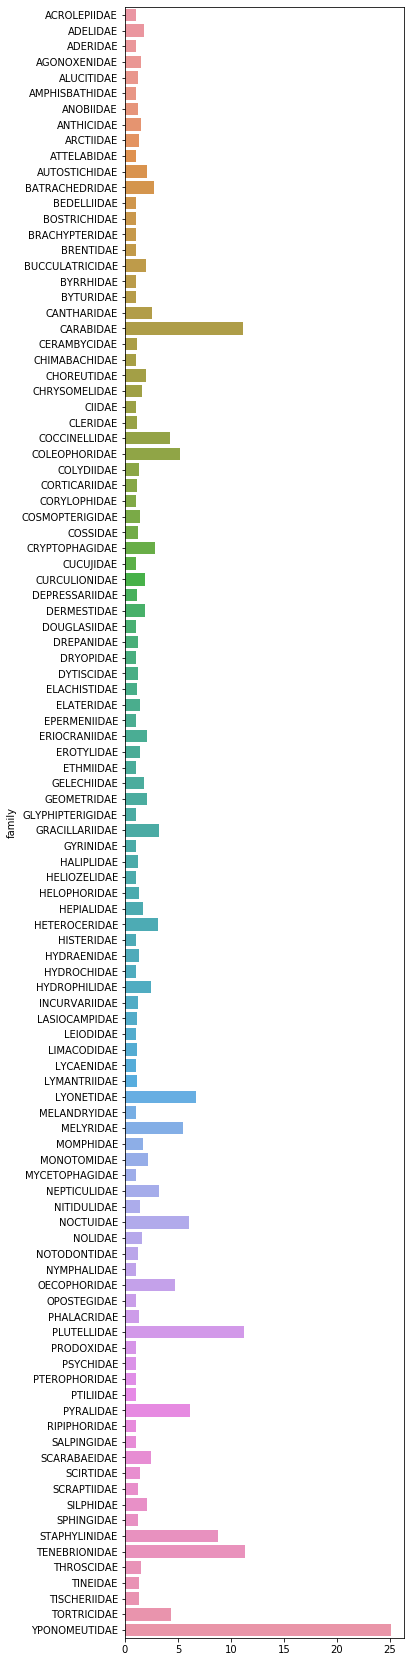

In [16]:
plt.figure(figsize=(5,30))
Axes = sns.barplot(y = series.index, x =series.values)
#Axes.set_xticklabels(Axes.get_xticklabels(), rotation=45)

In [49]:
series.values

array([ 1.        ,  1.79310345,  1.        ,  1.4765625 ,  1.27272727,
        1.        ,  1.24590164,  1.5       ,  1.35114504,  1.        ,
        2.10638298,  2.71889401,  1.        ,  1.        ,  1.        ,
        1.        ,  2.02259887,  1.        ,  1.        ,  2.53386454,
       11.1005291 ,  1.17647059,  1.        ,  2.        ,  1.65517241,
        1.        ,  1.14285714,  4.27597956,  5.23989899,  1.33333333,
        1.15625   ,  1.        ,  1.38095238,  1.25      ,  2.86425339,
        1.        ,  1.87007874,  1.10526316,  1.9296875 ,  1.        ,
        1.24666667,  1.        ,  1.19230769,  1.12068966,  1.40952381,
        1.        ,  2.1       ,  1.38461538,  1.        ,  1.82212811,
        2.11210526,  1.        ,  3.23734055,  1.        ,  1.2       ,
        1.        ,  1.35211268,  1.66666667,  3.08571429,  1.        ,
        1.32      ,  1.        ,  2.46257796,  1.25      ,  1.1       ,
        1.        ,  1.125     ,  1.        ,  1.17241379,  6.72

In [50]:
series['ACROLEPIIDAE']

1.0

In [18]:
df_InsectTrap.columns

Index(['order', 'family', 'name', 'year', 'date1', 'date2', 'individuals'], dtype='object')

In [32]:
df_OrderFamilyMeanIndividuals = df_InsectTrap.groupby([ "order", "family"])['individuals'].mean().reset_index()
df_OrderFamilySumIndividuals = df_InsectTrap.groupby([ "order", "family"])['individuals'].sum().reset_index()

Text(0, 0.5, 'Total individuals collected')

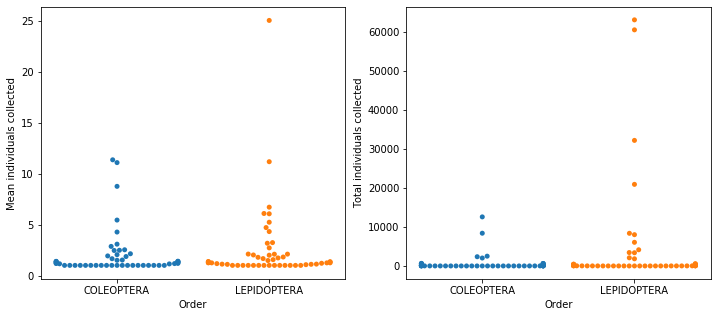

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(121)

ax =sns.swarmplot(x = 'order', y = 'individuals', data = df_OrderFamilyMeanIndividuals)
plt.xlabel('Order')
plt.ylabel('Mean individuals collected')

plt.subplot(122)
ax =sns.swarmplot(x = 'order', y = 'individuals', data = df_OrderFamilySumIndividuals)
plt.xlabel('Order')
plt.ylabel('Total individuals collected')


In [24]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

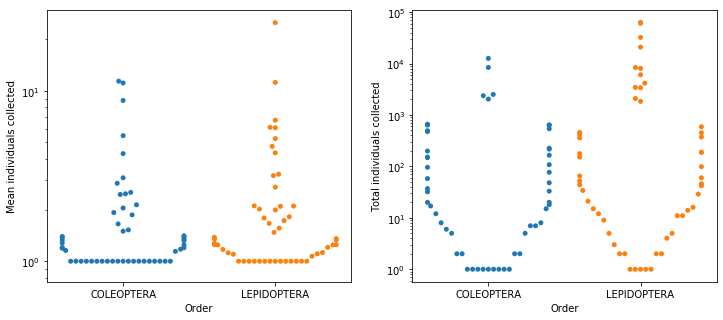

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(121)

ax =sns.swarmplot(x = 'order', y = 'individuals', data = df_OrderFamilyMeanIndividuals)
plt.xlabel('Order')
plt.ylabel('Mean individuals collected')
ax.set_yscale('log')
plt.subplot(122)
ax =sns.swarmplot(x = 'order', y = 'individuals', data = df_OrderFamilySumIndividuals)
plt.xlabel('Order')
plt.ylabel('Total individuals collected')
ax.set_yscale('log')

Looks like there is a large number of families for both orders that were collected only a few times and a a tiny number that dominates the counts. From these plots, Lepidoptera seem to have been collected a lot more, with the most-frequent families probably having more counts than all the beetles put together! Let's try that sum

In [37]:
df_InsectTrap.groupby('order')['individuals'].sum()

order
COLEOPTERA      33739
LEPIDOPTERA    218183
Name: individuals, dtype: int64

Yep, total Lepidoptera count was almost 8-fold the coleoptera count!

Text(0.5, 0, 'Counts (<1k)')

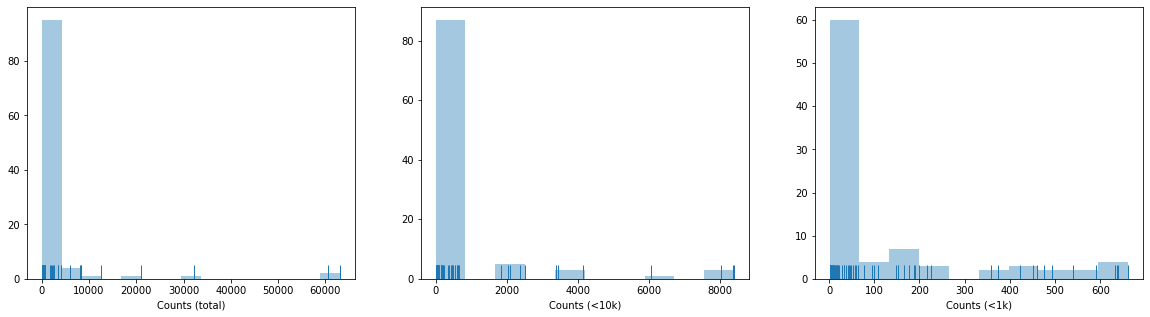

In [58]:
df_lessthan10k = df_OrderFamilySumIndividuals.loc[df_OrderFamilySumIndividuals['individuals'] < 10000]
df_lessthan1k = df_OrderFamilySumIndividuals.loc[df_OrderFamilySumIndividuals['individuals'] < 1000]

plt.figure(figsize=(20,5))
plt.subplot(131)

ax1 = sns.distplot(df_OrderFamilySumIndividuals.individuals, bins = 15, kde = False, rug = True)
plt.xlabel('Counts (total)')

plt.subplot(132)
ax2 = sns.distplot(df_lessthan10k.individuals, bins = 10, kde =False, rug = True)
plt.xlabel('Counts (<10k)')

plt.subplot(133)
ax3 =sns.distplot(df_lessthan1k.individuals, bins = 10, kde =False, rug = True)
plt.xlabel('Counts (<1k)')

In [50]:

#(df.loc[df['A'] == 'foo'])

df_lessthan10k = df_OrderFamilySumIndividuals.loc[df_OrderFamilySumIndividuals['individuals'] < 10000]
df_lessthan1k = df_OrderFamilySumIndividuals.loc[df_OrderFamilySumIndividuals['individuals'] < 1000]

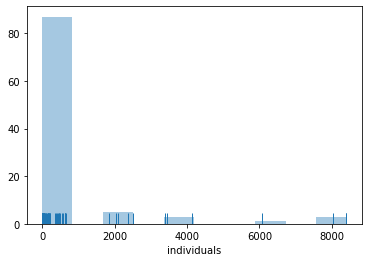

In [55]:
plt.figure()



Maybe try to fit a power law here?

In [59]:
series

family
ACROLEPIIDAE        1.000
ADELIDAE            1.793
ADERIDAE            1.000
AGONOXENIDAE        1.477
ALUCITIDAE          1.273
AMPHISBATHIDAE      1.000
ANOBIIDAE           1.246
ANTHICIDAE          1.500
ARCTIIDAE           1.351
ATTELABIDAE         1.000
AUTOSTICHIDAE       2.106
BATRACHEDRIDAE      2.719
BEDELLIIDAE         1.000
BOSTRICHIDAE        1.000
BRACHYPTERIDAE      1.000
BRENTIDAE           1.000
BUCCULATRICIDAE     2.023
BYRRHIDAE           1.000
BYTURIDAE           1.000
CANTHARIDAE         2.534
CARABIDAE          11.101
CERAMBYCIDAE        1.176
CHIMABACHIDAE       1.000
CHOREUTIDAE         2.000
CHRYSOMELIDAE       1.655
CIIDAE              1.000
CLERIDAE            1.143
COCCINELLIDAE       4.276
COLEOPHORIDAE       5.240
COLYDIIDAE          1.333
                    ...  
MYCETOPHAGIDAE      1.000
NEPTICULIDAE        3.176
NITIDULIDAE         1.385
NOCTUIDAE           6.070
NOLIDAE             1.563
NOTODONTIDAE        1.207
NYMPHALIDAE         1.000
OECOP

In [60]:
series.describe()

count    104.000
mean       2.296
std        3.084
min        1.000
25%        1.000
50%        1.261
75%        2.030
max       25.072
Name: individuals, dtype: float64

In [63]:
df_ypono = df_InsectTrap[df_InsectTrap.values == 'YPONOMEUTIDAE']


In [64]:
df_ypono.individuals.describe()

count    2518.000
mean       25.072
std       237.844
min         1.000
25%         1.000
50%         2.000
75%         5.000
max      8396.000
Name: individuals, dtype: float64

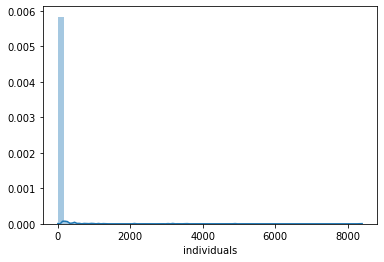

In [65]:
sns.distplot(df_ypono.individuals)

In [73]:
df_ypono.sort_values('individuals',ascending = False)[1:50]

,order,family,name,year,date1,date2,individuals
36612,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2006,7/21/06,7/27/06,4872
36613,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2006,7/28/06,8/3/06,3543
36611,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2006,7/14/06,7/20/06,3174
36531,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2000,7/21/00,7/24/00,3074
36578,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2004,8/2/04,8/3/04,2125
36592,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2005,7/12/05,7/14/05,1284
36567,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2003,7/21/03,7/24/03,1131
36577,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2004,7/30/04,8/1/04,1000
36532,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2000,7/25/00,7/27/00,938
36545,LEPIDOPTERA,YPONOMEUTIDAE,Yponomeuta evonymella L.,2001,7/26/01,7/29/01,919


limit_output extension: Maximum message size of 10000 exceeded with 11343 characters

In [77]:
series = df_InsectTrap.groupby('order')['family'].unique()

In [81]:
len(series.LEPIDOPTERA)

52